1. Data Cleaning and Exploration:

Project: Clean and explore a dataset like the famous Iris dataset.
Skills: Pandas, Matplotlib/Seaborn.
Objective: Showcase data cleaning techniques and basic exploratory data analysis.


1. **Data Acquisition:**
    - Download the Tips dataset. This dataset is available in several places, one of which is the UCI Machine Learning Repository.

2. **Data Loading:**
    - Use pandas to load the dataset into a DataFrame.

3. **Data Cleaning:**
    - Check for missing values and handle them. This could be by removing rows with missing values or filling them with appropriate values.
    - Check for duplicate entries and handle them.
    - Check the data types of the columns and make sure they are appropriate for the data they contain.

4. **Data Exploration:**
    - Use methods like `describe()`, `info()`, and `value_counts()` to get a sense of the data.
    - Use visualizations to further understand the data. This could include histograms, scatter plots, and box plots.

5. **Feature Engineering:**
    - Depending on the results of the data exploration, you might want to create new features that can better represent the information in the dataset.

6. **Data Analysis:**
    - Use statistical methods to analyze the data. This could include finding the mean, median, mode, standard deviation, etc.
    - Use visualizations to present your findings. This could include bar plots, pie charts, etc.

7. **Conclusion:**
    - Summarize your findings and the steps you took in your analysis.
    - Discuss any potential improvements that could be made or new questions that arose during your analysis.

Remember, the goal of this project is to showcase data cleaning techniques and basic exploratory data analysis. So, make sure to explain your steps and findings clearly.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#load & Preview tips dataset
tips_data = sns.load_dataset('tips')
tips_data

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


3. **Data Cleaning:**
- Check for missing values and handle them. This could be by removing rows with missing values or filling them with appropriate values.
- Check for duplicate entries and handle them.
- Check the data types of the columns and make sure they are appropriate for the data they contain.

In [5]:
#check for missing values and confirm appropriate data types
tips_data.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [6]:
#check for duplicate entries
tips_data.duplicated().sum()

1

In [7]:
#investigate duplicate entries to decide how to handle them
duplicates = tips_data[tips_data.duplicated(keep=False)]
duplicates

,total_bill,tip,sex,smoker,day,time,size
198,13.0,2.0,Female,Yes,Thur,Lunch,2
202,13.0,2.0,Female,Yes,Thur,Lunch,2


In [8]:
#drop duplicate entries from current df & confirm
tips_data.drop_duplicates(inplace=True)
tips_data.duplicated().sum()

0

In [9]:
#confirm data types are appropriate for each column
print(tips_data.dtypes)

total_bill     float64
tip            float64
sex           category
smoker        category
day           category
time          category
size             int64
dtype: object


4. **Data Exploration & Analysis**
    

In [20]:
#take a peak at some high level statistics for each column
tips_data.describe(include='all')

,total_bill,tip,sex,smoker,day,time,size
count,243.000000,243.000000,243,243,243,243,243.000000
unique,NaN,NaN,2,2,4,2,NaN
top,NaN,NaN,Male,No,Sat,Dinner,NaN
freq,NaN,NaN,157,151,87,176,NaN
mean,19.813868,3.002387,NaN,NaN,NaN,NaN,2.572016
std,8.910071,1.385002,NaN,NaN,NaN,NaN,0.952356
min,3.070000,1.000000,NaN,NaN,NaN,NaN,1.000000
25%,13.380000,2.000000,NaN,NaN,NaN,NaN,2.000000
50%,17.810000,2.920000,NaN,NaN,NaN,NaN,2.000000
75%,24.175000,3.575000,NaN,NaN,NaN,NaN,3.000000


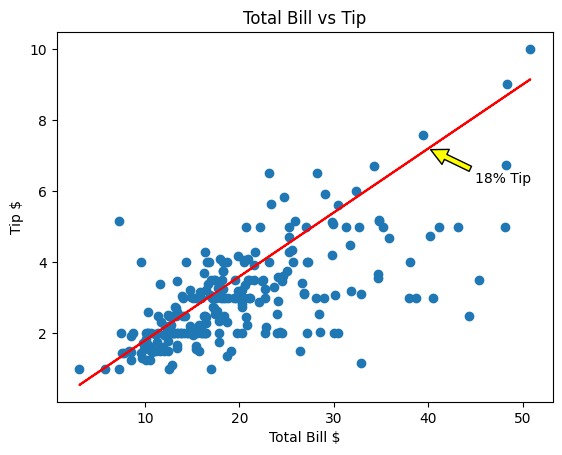

In [47]:
#scatter plot of total bill vs tip
plt.scatter(tips_data['total_bill'], tips_data['tip'])

#add line to plot that represents 18% tip ratio
plt.plot(tips_data['total_bill'], tips_data['total_bill'] * .18, color = 'red')

#label & plot
plt.xlabel('Total Bill $')
plt.ylabel('Tip $')
plt.title('Total Bill vs Tip')
plt.annotate('18% Tip', xy=(40, 40*0.18), xytext=(45, 6.25), arrowprops=dict(facecolor='yellow', shrink=0.05))
plt.show()

count    243.000000
mean       0.160831
std        0.061197
min        0.035638
25%        0.128833
50%        0.155219
75%        0.191746
max        0.710345
Name: tip_ratio, dtype: float64

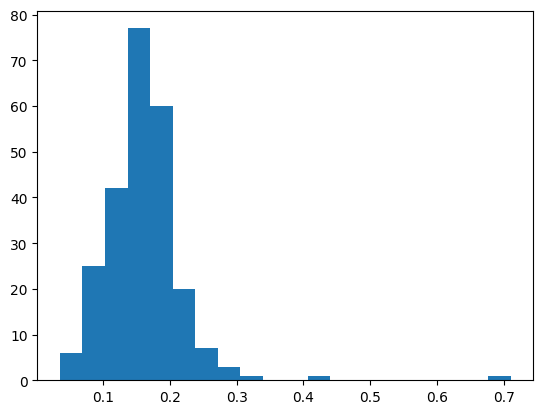

In [54]:
#using 18% tip ratio as a baseline, create new column that shows tip % for each entry and then conduct statistical analysis
tips_data['tip_ratio'] = tips_data['tip']/tips_data['total_bill']

#plot histogram of tip ratios
plt.hist(tips_data['tip_ratio'], bins=20)

#print table to show statistical analysis of tip ratios
tips_data['tip_ratio'].describe()

In [96]:
#create table to show counts for common tip ratio ranges

# Define the range of tip values bins
bin_edges = [0, 0.1, 0.12, 0.15, 0.20, 0.3, 1]

# Create bins for the tip ratios
bins = pd.cut(tips_data['tip_ratio'], bins=bin_edges)

# Calculate the counts for each bin
tip_ratio_table = pd.crosstab(index=bins, columns='Count')

# Add a third custom column to the table
tip_ratio_table['Tip Judgement Category'] = ['Why are you eatting out, go home', 'Better than Nothing', 'Thank You', 'Thank You Very Much', 'It is Going to Be a Good Day!', 'A Blessing!!']

# Reorder the columns
tip_ratio_table = tip_ratio_table.reindex(columns=['Tip Judgement Category', 'Count'])

print(tip_ratio_table)

col_0                   Tip Judgement Category  Count
tip_ratio                                            
(0.0, 0.1]    Why are you eatting out, go home     27
(0.1, 0.12]                Better than Nothing     20
(0.12, 0.15]                         Thank You     62
(0.15, 0.2]                Thank You Very Much     95
(0.2, 0.3]       It is Going to Be a Good Day!     36
(0.3, 1.0]                        A Blessing!!      3
